In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Enthusiasticguy/tashkent_housing/refs/heads/main/tashkent_housing.csv")
df.drop('location', axis = 1, inplace = True)

In [5]:
df = df[df['district'] == 'Чиланзарский']

In [6]:
df

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
...,...,...,...,...,...,...
7355,Чиланзарский,3,70.0,3,4,48000.0
7373,Чиланзарский,1,20.0,5,5,18500.0
7384,Чиланзарский,1,32.0,3,4,28000.0
7396,Чиланзарский,3,70.0,1,4,49800.0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

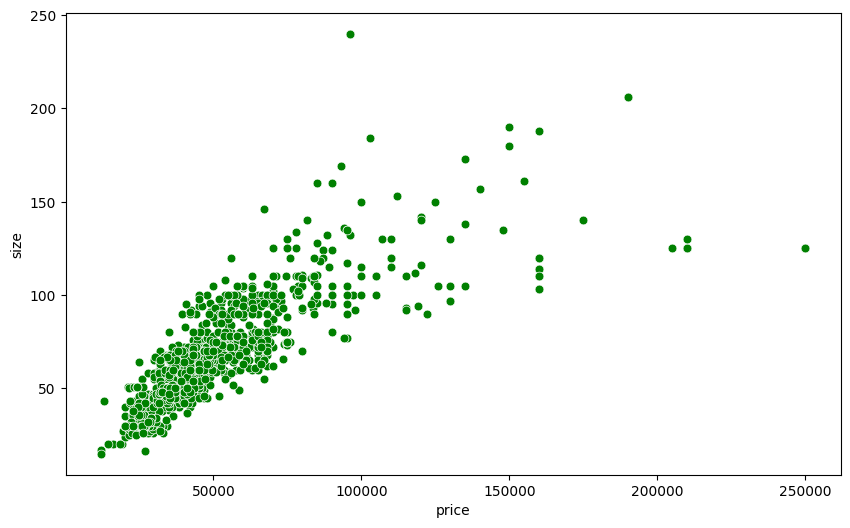

In [15]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'price', y = 'size', color = "green", s = 40)
plt.show()

In [16]:
df.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [17]:
class MyLinearModel:
  def __init__(self):
    self.beta_0 = 0
    self.beta_1 = 1
  def fit(self, X, Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    numerator = np.sum((X - mean_x) * (Y - mean_y))
    denominator = np.sum((X - mean_x) ** 2)

    self.beta_1 = numerator / denominator
    self.beta_0 = mean_y - self.beta_1 * mean_x
  def predict(self, X):
    X = pd.Series(X).values
    return self.beta_0 + self.beta_1 * X

In [18]:
model = MyLinearModel()

In [19]:
model.fit(df['size'], df['price'])

In [20]:
prediction = model.predict(df['size'])

In [21]:
pd.DataFrame({'predicted':prediction, 'y label':df['price']})

,predicted,y label
2,30089.161063,37000.0
3,49070.639650,49500.0
4,53197.048039,55000.0
5,18535.217575,25500.0
6,20185.780930,21200.0
...,...,...
7355,53197.048039,48000.0
7373,11932.964153,18500.0
7384,21836.344286,28000.0
7396,53197.048039,49800.0


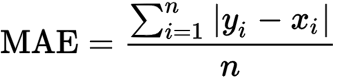

In [45]:
Y = df['price'].values
mae = np.sum(np.abs(prediction - Y)) / df.shape[0]
mae

8750.306636375613

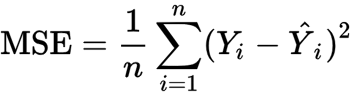

In [44]:
mse_square = np.sum((prediction - Y)**2) / df.shape[0]
mse = np.sqrt(mse_square)
mse

16580.51429301322